In [1]:
import pandas as pd
import numpy as np

importing app1 and app2 review data

In [2]:
app1_data = pd.read_excel('ReviewData.xlsx')
app2_data = pd.read_excel('Review Data2.xlsx')

checking data types and null values in app1_data

In [3]:
app1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147605 entries, 0 to 147604
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ID         147605 non-null  int64 
 1   CleanText  147605 non-null  object
 2   rating     147605 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


checking statistics and unique values in app1_data

In [4]:
app1_data.describe(include='all')

ID CleanText         rating
count   147605.000000    147605  147605.000000
unique            NaN    115354            NaN
top               NaN  easy use            NaN
freq              NaN      3953            NaN
mean     73803.000000       NaN       4.006416
std      42610.037579       NaN       1.551617
min          1.000000       NaN       1.000000
25%      36902.000000       NaN       3.000000
50%      73803.000000       NaN       5.000000
75%     110704.000000       NaN       5.000000
max     147605.000000       NaN       5.000000

removing duplicates review from app1_data and storing fresh unique data in new dataframe app1_data1

In [5]:
app1_data1 = app1_data.drop_duplicates(subset=['CleanText'])
app1_data1 = app1_data1.reset_index(drop=True)

checking statistics of app1_data1

In [6]:
app1_data1.describe(include='all')

ID     CleanText         rating
count   115354.000000        115354  115354.000000
unique            NaN        115354            NaN
top               NaN  professional            NaN
freq              NaN             1            NaN
mean     72999.318602           NaN       3.785495
std      43578.825047           NaN       1.648280
min          1.000000           NaN       1.000000
25%      34667.250000           NaN       2.000000
50%      72084.500000           NaN       5.000000
75%     111614.750000           NaN       5.000000
max     147603.000000           NaN       5.000000

checking data types and null values in app2_data

In [7]:
app2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84696 entries, 0 to 84695
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         84696 non-null  int64 
 1   CleanText  84696 non-null  object
 2   rating     84696 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


checking statistics and unique values in app2_data

In [8]:
app2_data.describe(include='all')

ID CleanText        rating
count   84696.000000     84696  84696.000000
unique           NaN     61746           NaN
top              NaN  easy use           NaN
freq             NaN      2540           NaN
mean    42348.500000       NaN      3.907020
std     24449.773537       NaN      1.609688
min         1.000000       NaN      1.000000
25%     21174.750000       NaN      3.000000
50%     42348.500000       NaN      5.000000
75%     63522.250000       NaN      5.000000
max     84696.000000       NaN      5.000000

removing duplicates review from app2_data and storing fresh unique data in new dataframe app2_data1

In [9]:
app2_data1 = app2_data.drop_duplicates(subset=['CleanText'])
app2_data1 = app2_data1.reset_index(drop=True)

checking statistics of app1_data2

In [10]:
app2_data1.describe(include='all')

ID                                          CleanText  \
count   61746.000000                                              61746   
unique           NaN                                              61746   
top              NaN  customer support available though marked websi...   
freq             NaN                                                  1   
mean    39690.988987                                                NaN   
std     24796.431725                                                NaN   
min         1.000000                                                NaN   
25%     17920.250000                                                NaN   
50%     37674.500000                                                NaN   
75%     60891.500000                                                NaN   
max     84696.000000                                                NaN   

              rating  
count   61746.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean        3.601351  
std         1.743966  
min         1.000000  
25%         1.000000  
50%         5.000000  
75%         5.000000  
max         5.000000

Mean Rating Based Decision

From both app rating description we can observe that mean rating of app1 is more than that of app2, through mean rating we can conclude that app1 is better than app2

Adding an identifier column so that data can be seperated using this identifier from combined data after sentimental classification using VADER

In [11]:
app1_data1['source'] = 'ReviewData1'
app2_data1['source'] = 'ReviewData2'

combining both apps data

In [12]:
combined_app_data = pd.concat([app1_data1, app2_data1], ignore_index=True)

checking data types and null values in combined_app_data

In [13]:
combined_app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177100 entries, 0 to 177099
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ID         177100 non-null  int64 
 1   CleanText  177100 non-null  object
 2   rating     177100 non-null  int64 
 3   source     177100 non-null  object
dtypes: int64(2), object(2)
memory usage: 5.4+ MB


checking statistics of combined_app_data, we can see on combining unique reviews of app1_data and app2_data there are still some duplicate reviews as count and unique values are different, this might be because few reviews of both apps are exactly same.

In [14]:
combined_app_data.describe(include='all')

ID     CleanText         rating       source
count   177100.000000        177100  177100.000000       177100
unique            NaN        174153            NaN            2
top               NaN  professional            NaN  ReviewData1
freq              NaN             2            NaN       115354
mean     61386.353495           NaN       3.721293          NaN
std      41271.082010           NaN       1.684542          NaN
min          1.000000           NaN       1.000000          NaN
25%      26274.000000           NaN       2.000000          NaN
50%      55745.500000           NaN       5.000000          NaN
75%      90151.250000           NaN       5.000000          NaN
max     147603.000000           NaN       5.000000          NaN

checking length of individual and combined app data

In [15]:
print(f"length of app1_data1 : {len(app1_data1)}")
print(f"length of app2_data1 : {len(app2_data1)}")
print(f"length of combined_app_data1 : {len(combined_app_data)}")

length of app1_data1 : 115354
length of app2_data1 : 61746
length of combined_app_data1 : 177100


In [16]:
combined_app_data

ID                                          CleanText  rating  \
0           1                                       professional       5   
1           2  buggy far mostly customer support always late ...       1   
2           3                 great easy navigate use super easy       5   
3           4  airbus use affordable years ago shock discover...       1   
4           5  easy use great rates love meeting host super f...       5   
...       ...                                                ...     ...   
177095  84689  try type venice search function crashes immedi...       1   
177096  84692  clean room many facilities u ask towel soap mi...       5   
177097  84693  good guide travels asia good choice hotels pic...       2   
177098  84694                                   useful times use       4   
177099  84696                                         great slow       4   

             source  
0       ReviewData1  
1       ReviewData1  
2       ReviewData1  
3       ReviewData1  
4       ReviewData1  
...             ...  
177095  ReviewData2  
177096  ReviewData2  
177097  ReviewData2  
177098  ReviewData2  
177099  ReviewData2  

[177100 rows x 4 columns]

Before applying VADER for sentimental classification teat data need to be preprocessed, but here since we have clean data already available, will apply VADER without preprocessing it

analyzer = SentimentIntensityAnalyzer(): This initializes the VADER sentiment analyzer.

vs = analyzer.polarity_scores(text): This computes the polarity scores for the input text. The vs dictionary contains scores for 'positive', 'neutral', 'negative', and 'compound'.

VADER calculates individual sentiment scores (positive, neutral, negative) for each word in the text.
These scores are then combined using heuristics and weighted for factors such as negation, punctuation, capitalization, degree modifiers, and conjunctions.
The resulting composite score is normalized to produce the compound score.

Typically, compound scores are interpreted as follows:

Positive Sentiment: Compound score >= 0.05

Neutral Sentiment: Compound score between -0.05 and 0.05

Negative Sentiment: Compound score <= -0.05

In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
def analyze_sentiment_vader(text):
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(text)
    if vs['compound'] >= 0.05:
        return 'positive'
    elif vs['compound'] > -0.05 and vs['compound'] < 0.05:
        return 'neutral'
    else:
        return 'negative'

applying the above function definition to 'CleanText' and calculating total time by VADER for combined data

In [18]:
import time
start_time = time.time()
combined_app_data.loc[:, 'sentiment_vader'] = combined_app_data['CleanText'].apply(analyze_sentiment_vader)
total_time_vader = time.time() - start_time

In [22]:
print('total_time_vader_in_minutes', total_time_vader/60 )

total_time_vader_in_minutes 57.08552552858988


In [23]:
combined_app_data

ID                                          CleanText  rating  \
0           1                                       professional       5   
1           2  buggy far mostly customer support always late ...       1   
2           3                 great easy navigate use super easy       5   
3           4  airbus use affordable years ago shock discover...       1   
4           5  easy use great rates love meeting host super f...       5   
...       ...                                                ...     ...   
177095  84689  try type venice search function crashes immedi...       1   
177096  84692  clean room many facilities u ask towel soap mi...       5   
177097  84693  good guide travels asia good choice hotels pic...       2   
177098  84694                                   useful times use       4   
177099  84696                                         great slow       4   

             source sentiment_vader  
0       ReviewData1         neutral  
1       ReviewData1        positive  
2       ReviewData1        positive  
3       ReviewData1        negative  
4       ReviewData1        positive  
...             ...             ...  
177095  ReviewData2        negative  
177096  ReviewData2        positive  
177097  ReviewData2        positive  
177098  ReviewData2        positive  
177099  ReviewData2        positive  

[177100 rows x 5 columns]

making a copy of this combined_app_data and saving it as a csv file, so that it can be used afterwards just by importing it

In [19]:
combined_app_data_vader = combined_app_data.copy()

In [20]:
combined_app_data_vader.to_csv('combined_app_data_vader.csv', index=False)

In [3]:
import nltk
combined_app_data['num_characters'] = combined_app_data['CleanText'].apply(len)
combined_app_data['num_words'] = combined_app_data['CleanText'].apply(lambda x:len(nltk.word_tokenize(x)))
combined_app_data['num_sentences'] = combined_app_data['CleanText'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [12]:
combined_app_data

ID                                          CleanText  rating  \
0           1                                       professional       5   
1           2  buggy far mostly customer support always late ...       1   
2           3                 great easy navigate use super easy       5   
3           4  airbus use affordable years ago shock discover...       1   
4           5  easy use great rates love meeting host super f...       5   
...       ...                                                ...     ...   
177095  84689  try type venice search function crashes immedi...       1   
177096  84692  clean room many facilities u ask towel soap mi...       5   
177097  84693  good guide travels asia good choice hotels pic...       2   
177098  84694                                   useful times use       4   
177099  84696                                         great slow       4   

             source sentiment_vader  num_characters  num_words  num_sentences  
0       ReviewData1         neutral              12          1              1  
1       ReviewData1        positive              88         13              1  
2       ReviewData1        positive              34          6              1  
3       ReviewData1        negative             137         21              1  
4       ReviewData1        positive              76         13              1  
...             ...             ...             ...        ...            ...  
177095  ReviewData2        negative              56          8              1  
177096  ReviewData2        positive             327         55              1  
177097  ReviewData2        positive             242         38              1  
177098  ReviewData2        positive              16          3              1  
177099  ReviewData2        positive              10          2              1  

[177100 rows x 8 columns]

In [16]:
combined_app_data[['num_characters','num_words','num_sentences']].describe()

num_characters      num_words  num_sentences
count   177100.000000  177100.000000       177100.0
mean        66.788752      10.515223            1.0
std         68.026488      10.548043            0.0
min          1.000000       1.000000            1.0
25%         24.000000       4.000000            1.0
50%         41.000000       7.000000            1.0
75%         81.000000      13.000000            1.0
max       1755.000000     296.000000            1.0

In [5]:
combined_app_data[combined_app_data['sentiment_vader'] == 'positive'][['num_characters','num_words','num_sentences']].describe()

num_characters      num_words  num_sentences
count   119669.000000  119669.000000       119669.0
mean        58.822260       9.276078            1.0
std         59.553012       9.177358            0.0
min          2.000000       1.000000            1.0
25%         24.000000       4.000000            1.0
50%         38.000000       6.000000            1.0
75%         68.000000      11.000000            1.0
max       1755.000000     296.000000            1.0

In [6]:
combined_app_data[combined_app_data['sentiment_vader'] == 'negative'][['num_characters','num_words','num_sentences']].describe()

num_characters     num_words  num_sentences
count    33000.000000  33000.000000        33000.0
mean       114.544848     17.856152            1.0
std         86.926164     13.548257            0.0
min          3.000000      1.000000            1.0
25%         47.000000      7.000000            1.0
50%         90.000000     14.000000            1.0
75%        162.000000     25.000000            1.0
max        973.000000    160.000000            1.0

observation: length of characters and words for negative reviews is more than that for positive reviews

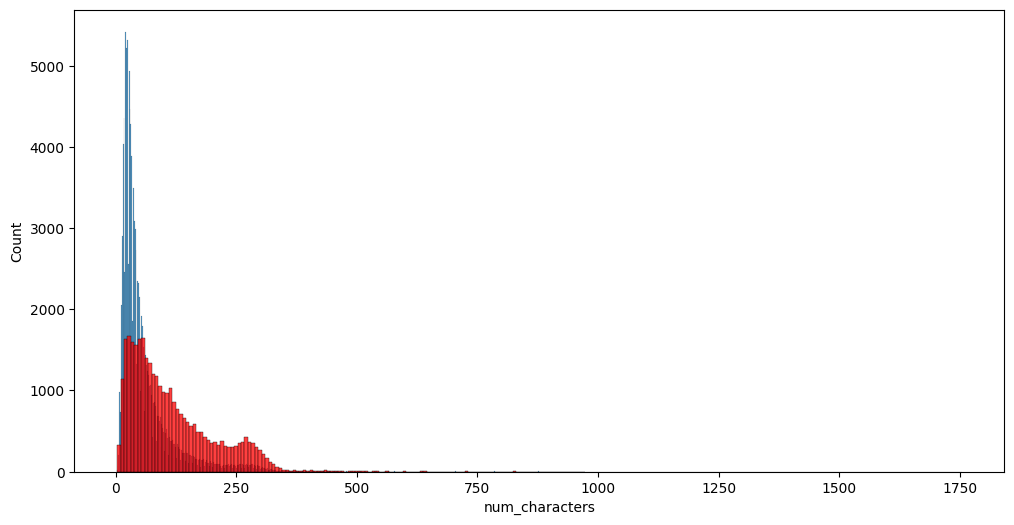

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(combined_app_data[combined_app_data['sentiment_vader'] == 'positive']['num_characters'])
sns.histplot(combined_app_data[combined_app_data['sentiment_vader'] == 'negative']['num_characters'],color='red')
plt.show()

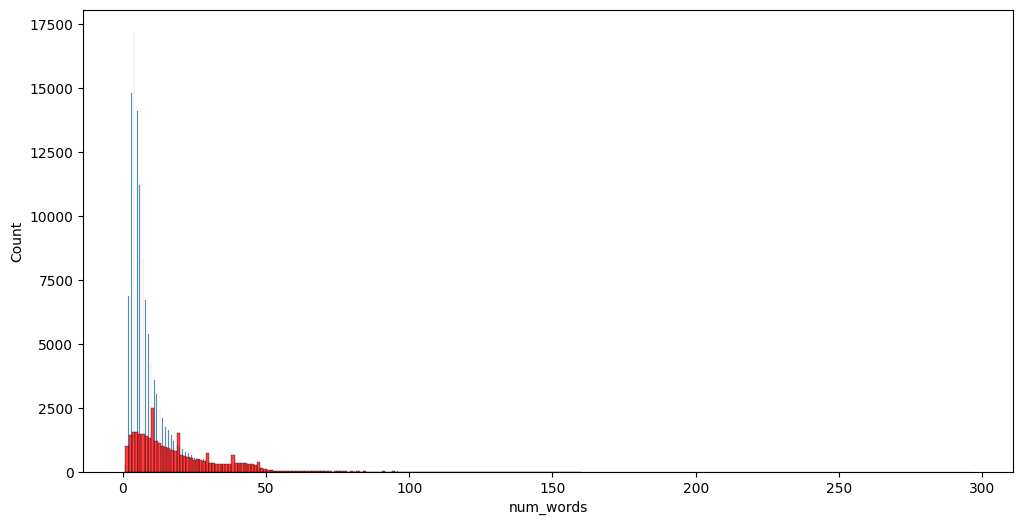

In [8]:
plt.figure(figsize=(12,6))
sns.histplot(combined_app_data[combined_app_data['sentiment_vader'] == 'positive']['num_words'])
sns.histplot(combined_app_data[combined_app_data['sentiment_vader'] == 'negative']['num_words'],color='red')
plt.show()

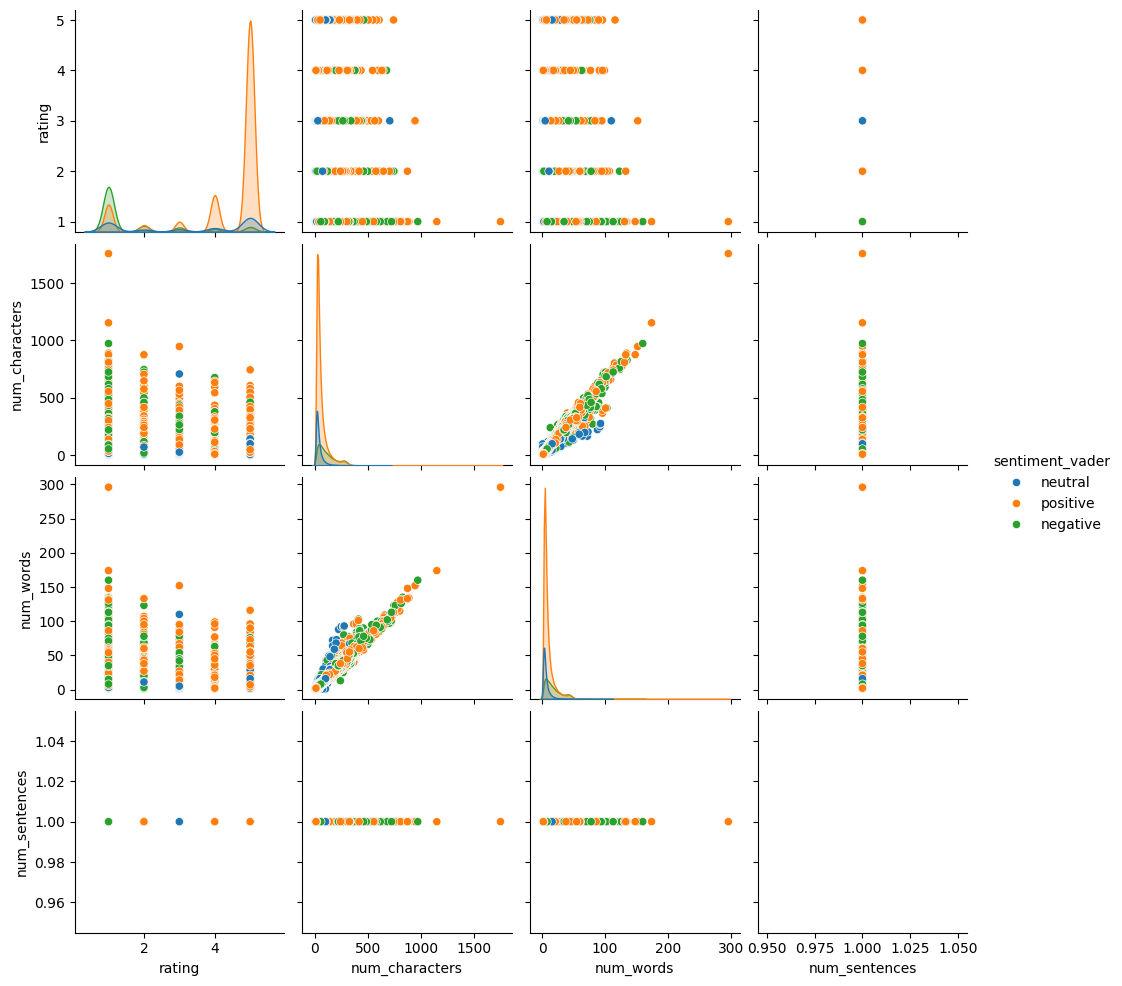

In [9]:
combined_app_data1 = combined_app_data.drop(columns=['ID'])
sns.pairplot(combined_app_data1,hue='sentiment_vader')

<Axes: >

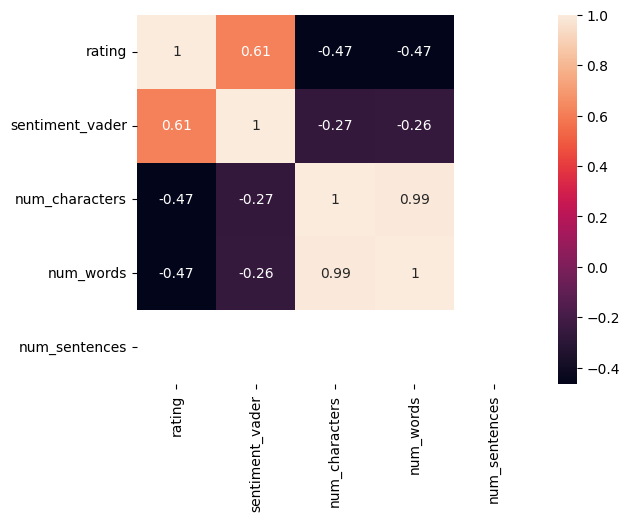

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
combined_app_data1['sentiment_vader'] = encoder.fit_transform(combined_app_data1['sentiment_vader'])
combined_app_data2 = combined_app_data1.drop(columns=['CleanText', 'source'])
sns.heatmap(combined_app_data2.corr(),annot=True)

counting sentiments value of combined data

In [13]:
vader_counts_combined = combined_app_data['sentiment_vader'].value_counts().reindex(['positive', 'neutral', 'negative'], fill_value=0)
vader_counts_combined

sentiment_vader
positive    119669
neutral      24431
negative     33000
Name: count, dtype: int64

visualizing sentiments counts & percentages of combined app data through graph and chart 

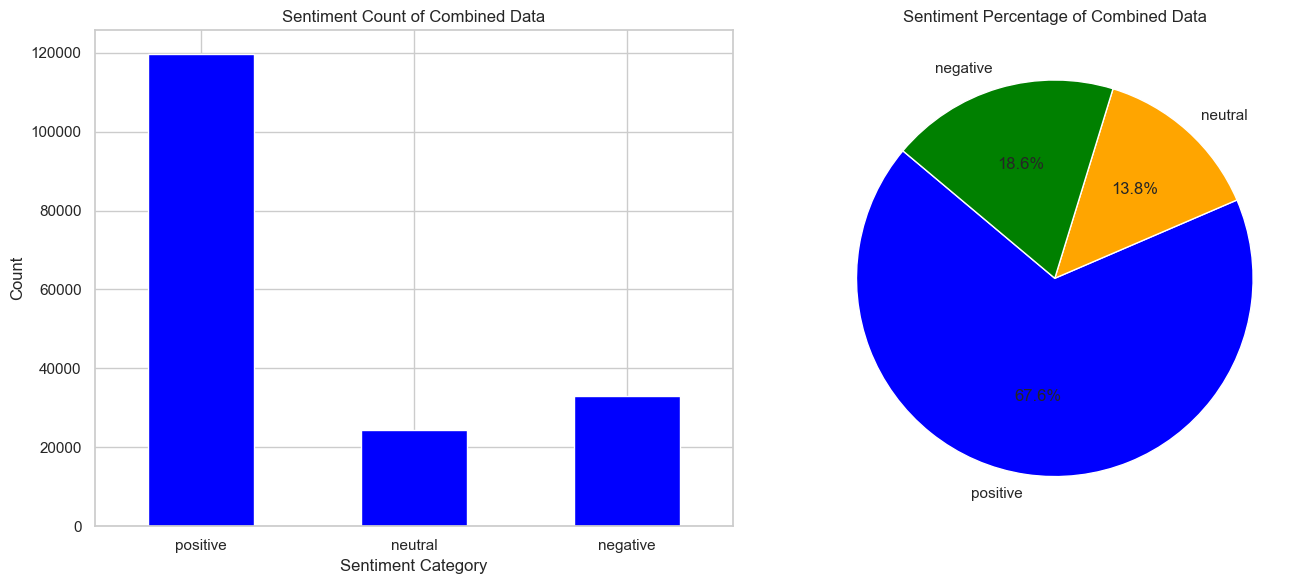

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plot_df = pd.DataFrame({
    'Sentiment_VADER_count': vader_counts_combined,
    'Sentiment_VADER_percentage': (vader_counts_combined / vader_counts_combined.sum()) * 100
    })

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar Graph for Counts
plot_df['Sentiment_VADER_count'].plot(kind='bar', ax=axes[0], color='blue')
axes[0].set_xlabel('Sentiment Category')
axes[0].set_ylabel('Count')
axes[0].set_title('Sentiment Count of Combined Data')
axes[0].set_xticks(range(len(plot_df)))
axes[0].set_xticklabels(plot_df.index, rotation=0)

# Pie Chart for Percentages
axes[1].pie(plot_df['Sentiment_VADER_percentage'], labels=plot_df.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'orange', 'green'])
axes[1].set_title('Sentiment Percentage of Combined Data')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


Creating a function for finding top sentiments unigrams and bigrams for apps data

In [11]:
from wordcloud import WordCloud, STOPWORDS

def process_sentiment(data, sentiment):
    # Filter sentiment data
    sentiment_df = data[data['sentiment_vader'] == sentiment]
    text = sentiment_df['CleanText'].tolist()
    text = " ".join(text)
    
    # Tokenize words
    words = nltk.word_tokenize(text)
    
    # Create unigrams
    unigram = list(nltk.ngrams(words, 1))
    ugram = [item[0] for item in unigram]
    
    # Frequency distribution for unigrams
    unigram_freq = nltk.FreqDist(ugram)
    sorted_ug = sorted(unigram_freq.items(), key=lambda x: x[1], reverse=True)  # Descending order
    
    # Create DataFrame for unigrams
    ug_df = pd.DataFrame(sorted_ug, columns=[f'{sentiment.capitalize()}_word', 'count'])
    print(f"Top 15 Unigrams for {sentiment.capitalize()} sentiment in given app data:")
    print(ug_df[:15])
    
    # Generate word cloud for unigrams
    sw = set(STOPWORDS)
    unigram_wordcloud = WordCloud(random_state=1, background_color="white", max_words=40,
                                  min_font_size=10, max_font_size=50, stopwords=sw).generate_from_frequencies(unigram_freq)
    plt.figure(figsize=(10, 6), facecolor=None)
    plt.gca().imshow(unigram_wordcloud, interpolation="bilinear")
    plt.title(f"{sentiment.capitalize()} Sentiment Wordcloud - Unigrams")
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    
    # Create bigrams
    bigram = list(nltk.ngrams(words, 2))
    bigram_list = [" ".join(item) for item in bigram]
    
    # Frequency distribution for bigrams
    bigram_freq = nltk.FreqDist(bigram_list)
    sorted_bg = sorted(bigram_freq.items(), key=lambda x: x[1], reverse=True)  # Descending order
    
    # Create DataFrame for bigrams
    bg_df = pd.DataFrame(sorted_bg, columns=[f'{sentiment.capitalize()}_bigram', 'count'])
    print(f"Top 15 Bigrams for {sentiment.capitalize()} sentiment in given app data:")
    print(bg_df[:15])
    
    # Generate word cloud for bigrams
    bigram_wordcloud = WordCloud(random_state=1, background_color="white", max_words=40,
                                 min_font_size=10, max_font_size=50, stopwords=sw).generate_from_frequencies(bigram_freq)
    plt.figure(figsize=(10, 6), facecolor=None)
    plt.gca().imshow(bigram_wordcloud, interpolation="bilinear")
    plt.title(f"{sentiment.capitalize()} Sentiment Wordcloud - Bigrams")
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    
    # Plot bar chart for top 15 unigrams
    plt.figure(figsize=(12, 8))
    top_15_unigrams = ug_df[:15]
    plt.barh(top_15_unigrams[f'{sentiment.capitalize()}_word'], top_15_unigrams['count'], color='skyblue')
    plt.xlabel('Count')
    plt.title(f'Top 15 Unigrams for {sentiment.capitalize()} Sentiment')
    plt.gca().invert_yaxis()
    plt.show()
    
    # Plot bar chart for top 15 bigrams
    plt.figure(figsize=(12, 8))
    top_15_bigrams = bg_df[:15]
    plt.barh(top_15_bigrams[f'{sentiment.capitalize()}_bigram'], top_15_bigrams['count'], color='lightgreen')
    plt.xlabel('Count')
    plt.title(f'Top 15 Bigrams for {sentiment.capitalize()} Sentiment')
    plt.gca().invert_yaxis()
    plt.show()


Displaying top sentiments unigrams and bigrams in combined_apps_data

Top 15 Unigrams for Positive sentiment in given app data:
   Positive_word  count
0           easy  31968
1            use  31106
2          great  24793
3           book  20067
4           good  19231
5           love  12425
6           stay  10634
7           find  10618
8          hotel  10613
9            get   9429
10          best   9157
11          make   8036
12        travel   7226
13          time   6953
14    experience   6902


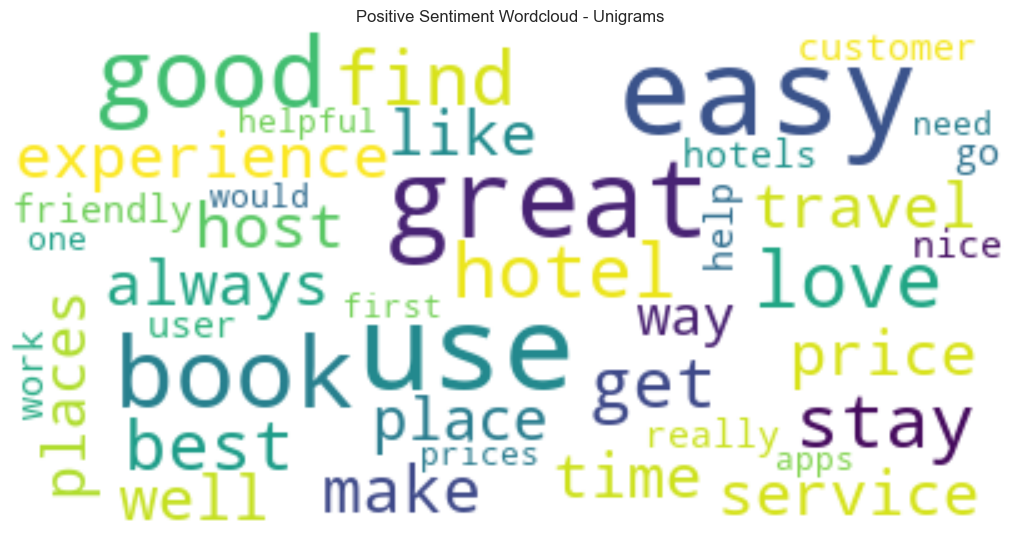

Top 15 Bigrams for Positive sentiment in given app data:
     Positive_bigram  count
0           easy use  12917
1      user friendly   3528
2   customer service   2459
3          easy book   2312
4        places stay   1901
5         first time   1731
6         place stay   1714
7         book hotel   1570
8          use great   1488
9      easy navigate   1440
10            air bb   1329
11         easy find   1289
12         great way   1062
13  great experience   1040
14        great easy   1035


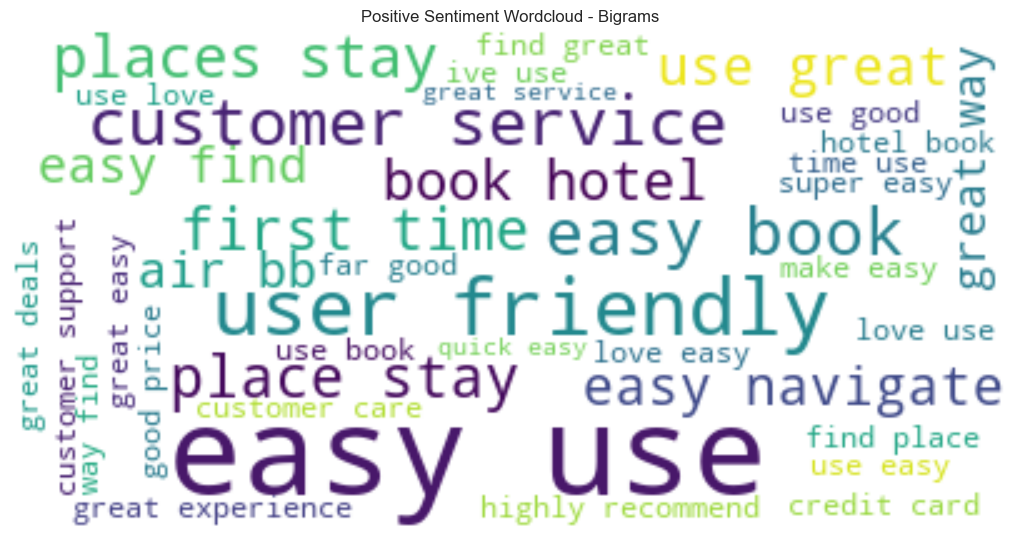

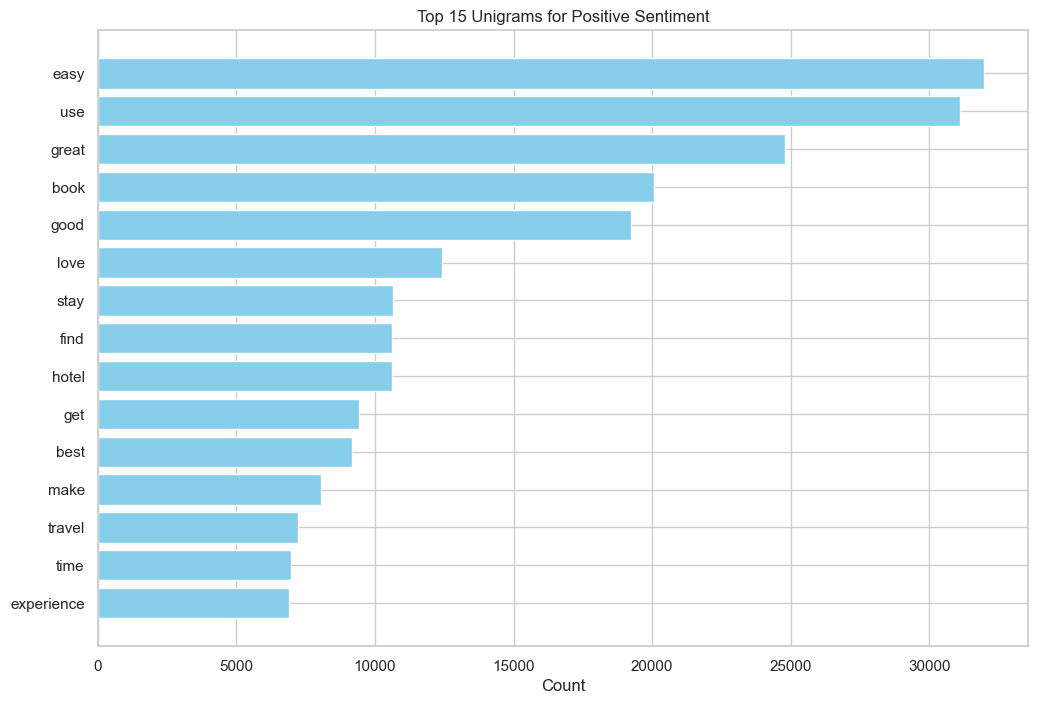

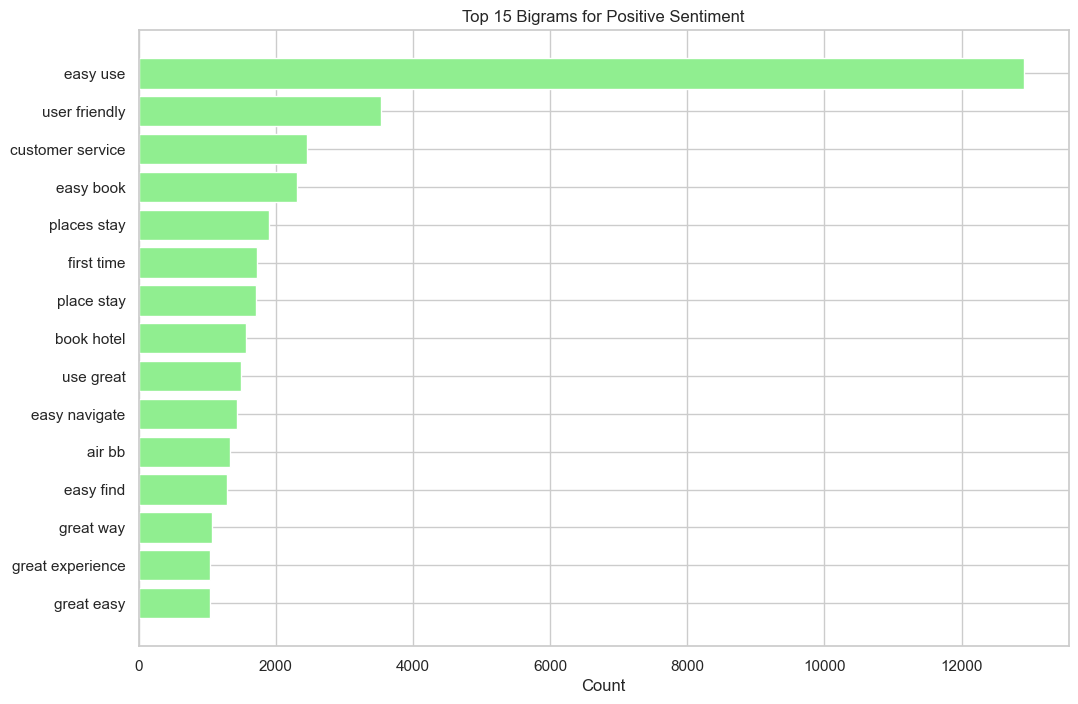

Top 15 Unigrams for Negative sentiment in given app data:
   Negative_word  count
0           book  14235
1          hotel   8097
2            use   7259
3            get   6760
4            bad   6424
5        service   5353
6       customer   5264
7           dont   4819
8         cancel   4565
9          money   4225
10           say   3985
11          host   3790
12           pay   3779
13        refund   3759
14          time   3707


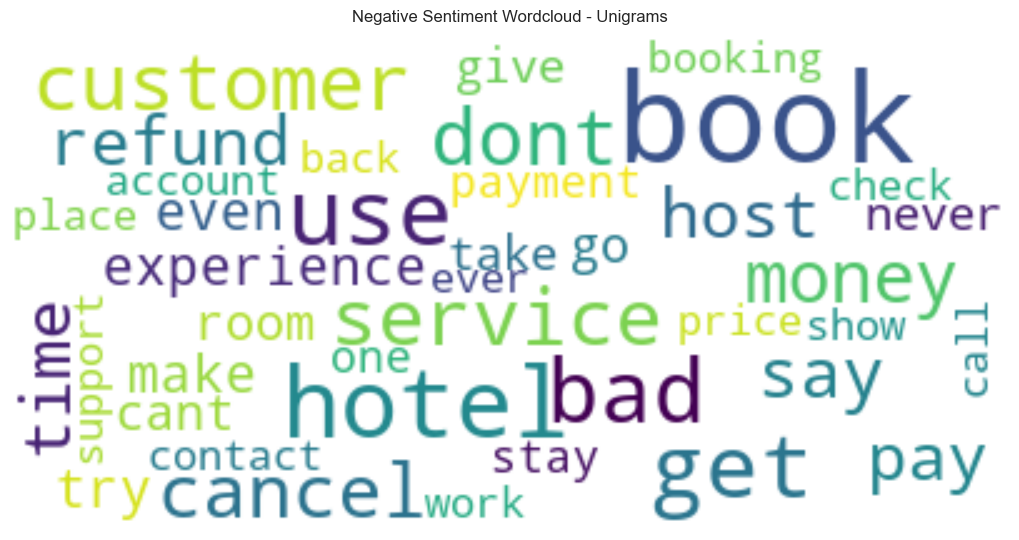

Top 15 Bigrams for Negative sentiment in given app data:
     Negative_bigram  count
0   customer service   2966
1     bad experience   1591
2         book hotel   1395
3      customer care    831
4        cancel book    774
5   customer support    691
6          never use    552
7          book room    534
8         hotel book    502
9         get refund    474
10          dont use    457
11       credit card    456
12          try book    446
13        waste time    440
14            air bb    437


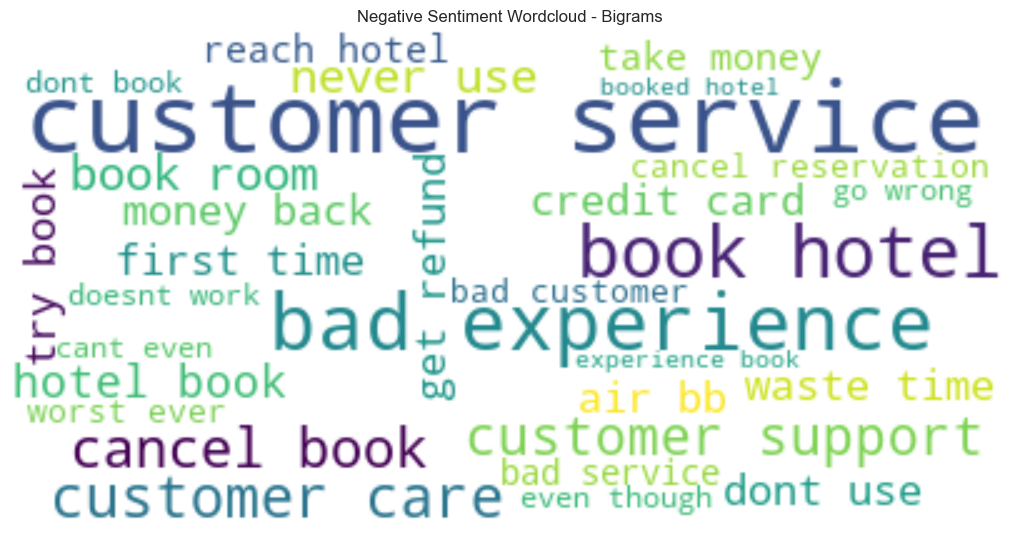

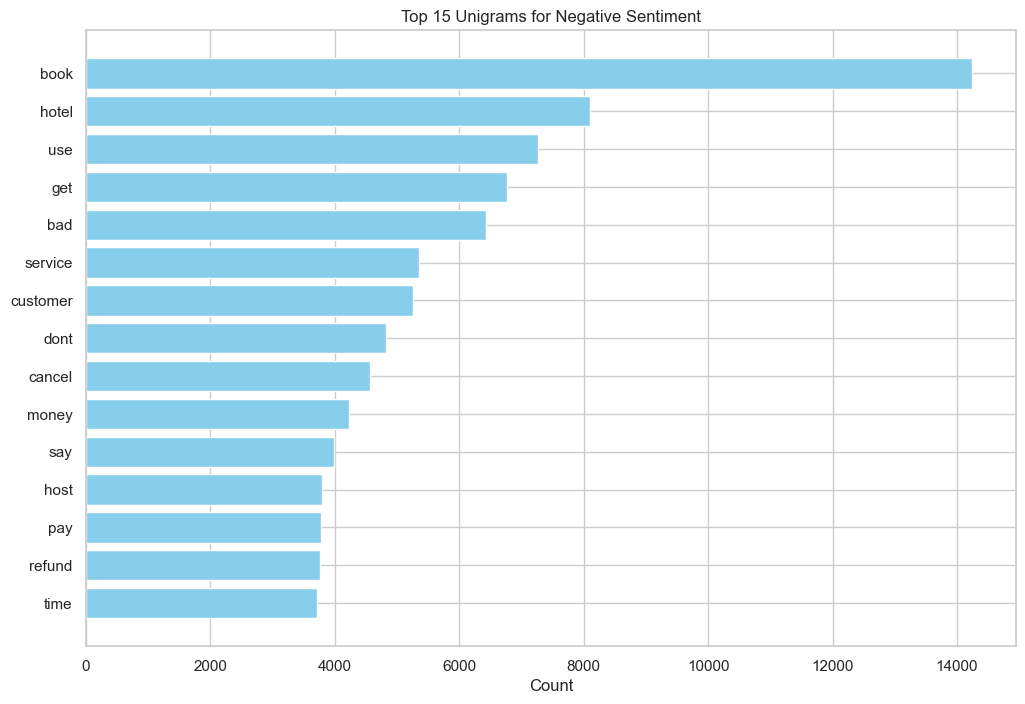

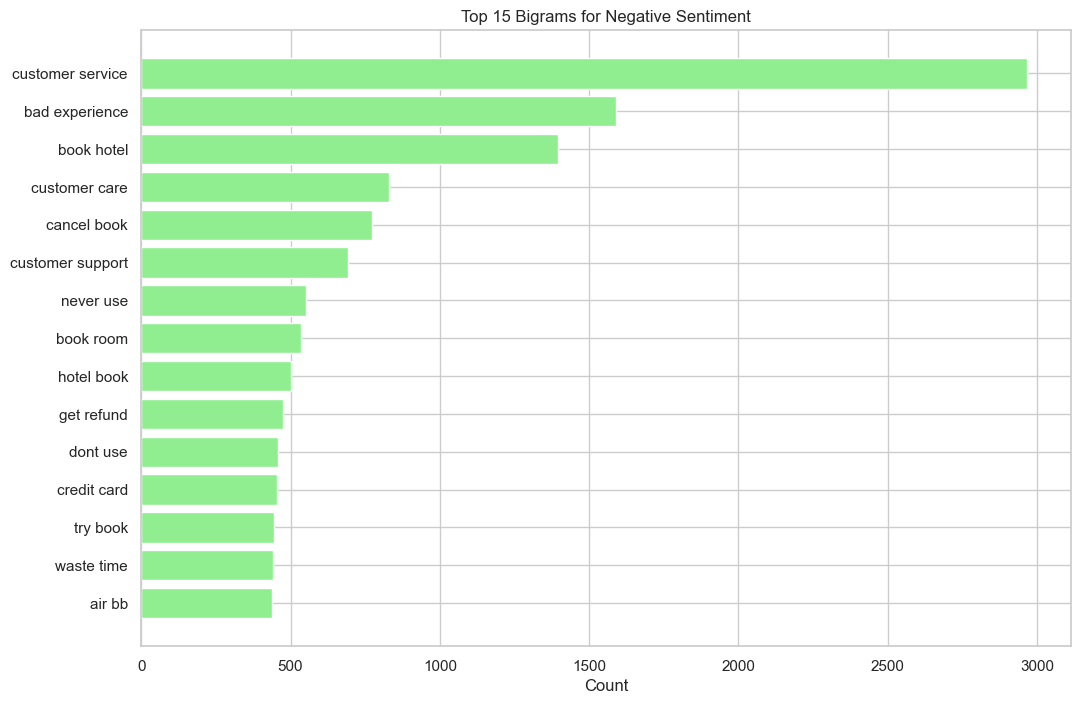

In [15]:
for sentiment in ['positive', 'negative']:
    process_sentiment(combined_app_data, sentiment)

Seperating all Apps data and drawing inferences from average length of words and characters across positive and negative sentiments

App1 DataFrame




ID                                          CleanText  rating  \
0            1                                       professional       5   
1            2  buggy far mostly customer support always late ...       1   
2            3                 great easy navigate use super easy       5   
3            4  airbus use affordable years ago shock discover...       1   
4            5  easy use great rates love meeting host super f...       5   
...        ...                                                ...     ...   
115349  147599  useful ive use quickly compose messages hosts ...       4   
115350  147600  great idea real shame fall short mark flips or...       1   
115351  147601  cant customize notification sound push notific...       3   
115352  147602  freezes white screen nova ideapad ive try inst...       1   
115353  147603         run background use phones memory dont open       1   

       sentiment_vader  num_characters  num_words  num_sentences  
0              neutral              12          1              1  
1             positive              88         13              1  
2             positive              34          6              1  
3             negative             137         21              1  
4             positive              76         13              1  
...                ...             ...        ...            ...  
115349        positive              72         10              1  
115350         neutral             191         29              1  
115351         neutral             361         49              1  
115352         neutral              69         11              1  
115353         neutral              42          7              1  

[115354 rows x 7 columns]




App2 DataFrame




ID                                          CleanText  rating  \
0          1  customer support available though marked websi...       1   
1          2                       trust issues sell fake hotel       1   
2          3                             take money hotel close       1   
3          4                                               slow       3   
4          5  bad hard talk customer service request refund ...       1   
...      ...                                                ...     ...   
61741  84689  try type venice search function crashes immedi...       1   
61742  84692  clean room many facilities u ask towel soap mi...       5   
61743  84693  good guide travels asia good choice hotels pic...       2   
61744  84694                                   useful times use       4   
61745  84696                                         great slow       4   

      sentiment_vader  num_characters  num_words  num_sentences  
0            positive             282         43              1  
1            positive              28          5              1  
2             neutral              22          4              1  
3             neutral               4          1              1  
4            negative              69         11              1  
...               ...             ...        ...            ...  
61741        negative              56          8              1  
61742        positive             327         55              1  
61743        positive             242         38              1  
61744        positive              16          3              1  
61745        positive              10          2              1  

[61746 rows x 7 columns]

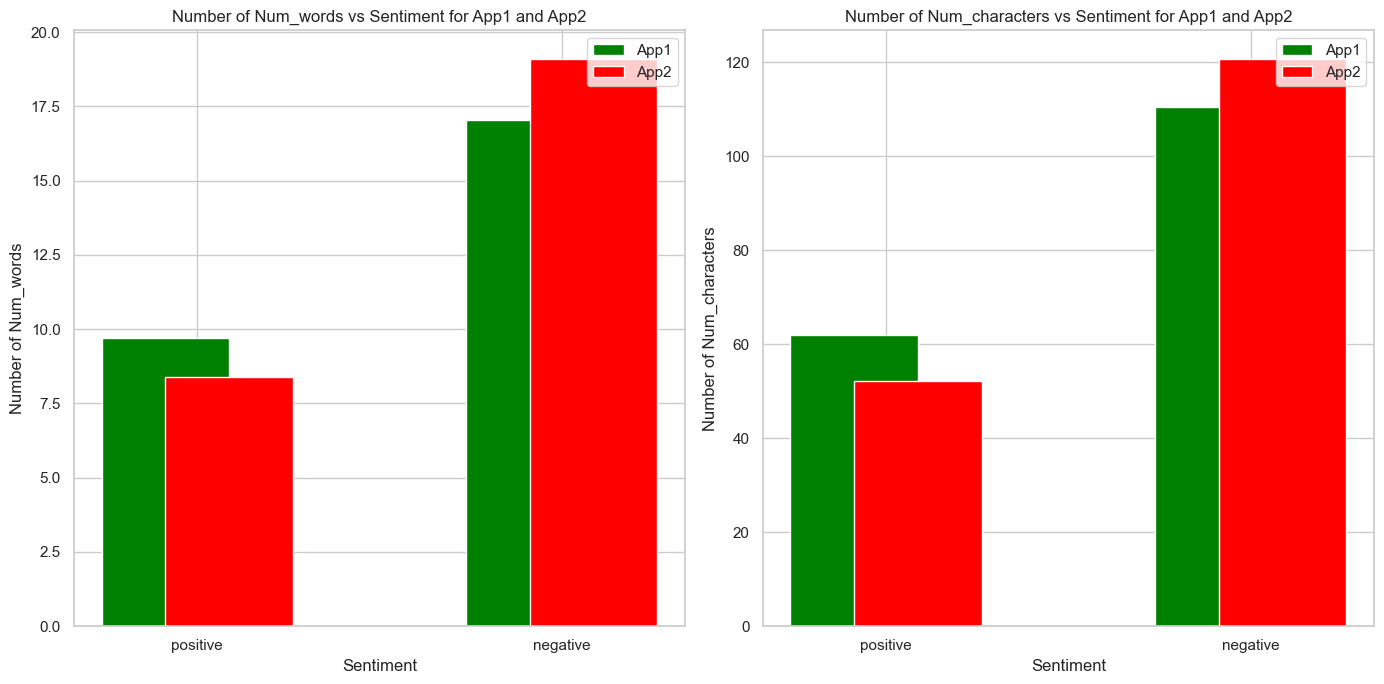

In [16]:
from IPython.display import display
separated_app_data = ['App1', 'App2']  # name accordingly for more apps
review_data_sources = ['ReviewData1', 'ReviewData2']  # List of corresponding review data sources

# Separate data based on source and reset index
separated_data = {
    app: combined_app_data[combined_app_data['source'] == review_source].drop(columns=['source']).reset_index(drop=True)
    for app, review_source in zip(separated_app_data, review_data_sources)
}

# Display separated data
for app, data in separated_data.items():
    print(f'{app} DataFrame\n\n')
    display(data)
    print('\n\n')

# Define metrics and colors
metrics = ['num_words', 'num_characters']
colors = ['green', 'red']

# Plotting the data side by side in the same graph
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Adjust the bar width and position
bar_width = 0.35
offset = bar_width / 2

# Loop through apps and metrics to create the bar plots
for i, (metric, ax) in enumerate(zip(metrics, axes)):
    for j, (app, color) in enumerate(zip(separated_app_data, colors)):
        app_pos = separated_data[app][separated_data[app]['sentiment_vader'] == 'positive']
        app_neg = separated_data[app][separated_data[app]['sentiment_vader'] == 'negative']
        
        # Combine the data for plotting
        app_counts = [app_pos[metric].mean(), app_neg[metric].mean()]
        
        x = ['positive', 'negative']
        x_app = [k + (j - 0.5) * offset for k in range(len(x))]
        
        ax.bar(x_app, app_counts, bar_width, label=app, color=color)
    
    ax.set_xticks(range(len(x)))
    ax.set_xticklabels(x)
    ax.set_title(f'Number of {metric.capitalize()} vs Sentiment for App1 and App2')
    ax.set_xlabel('Sentiment')
    ax.set_ylabel(f'Number of {metric.capitalize()}')
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

Displaying top sentiments unigrams and bigrams in all Apps

Ngrams and Wordcloud for positive sentiment in App1





Top 15 Unigrams for Positive sentiment in given app data:
   Positive_word  count
0            use  22030
1           easy  20440
2          great  19408
3           good  10954
4           love  10100
5           stay   9778
6           book   9404
7           find   8408
8           host   6797
9            get   6402
10        travel   5974
11          make   5858
12         place   5688
13        places   5603
14    experience   5568


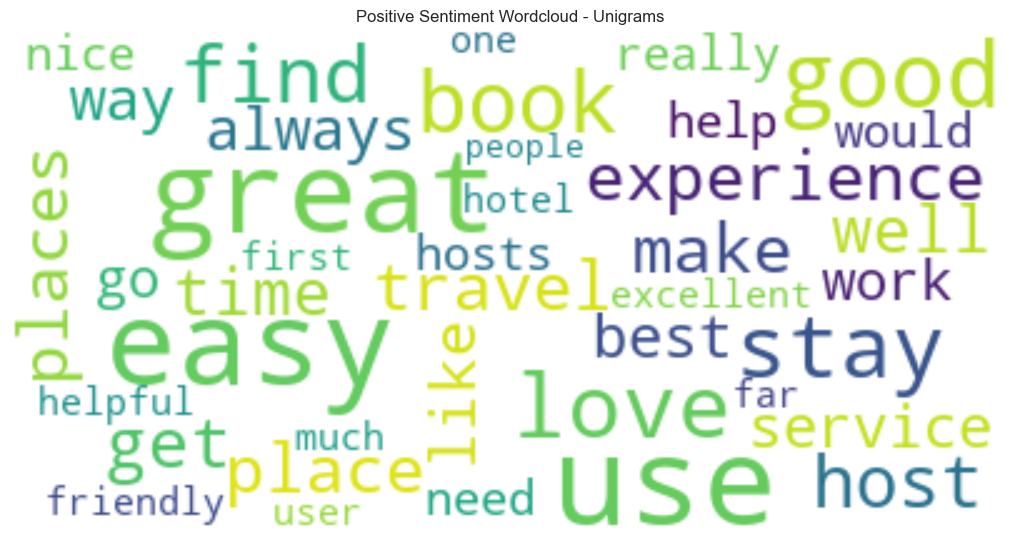

Top 15 Bigrams for Positive sentiment in given app data:
     Positive_bigram  count
0           easy use   8774
1      user friendly   2108
2        places stay   1862
3         place stay   1588
4   customer service   1528
5         first time   1362
6             air bb   1325
7          use great   1148
8      easy navigate   1109
9          great way   1026
10         easy book    996
11         easy find    911
12  great experience    907
13        great easy    786
14        find place    767


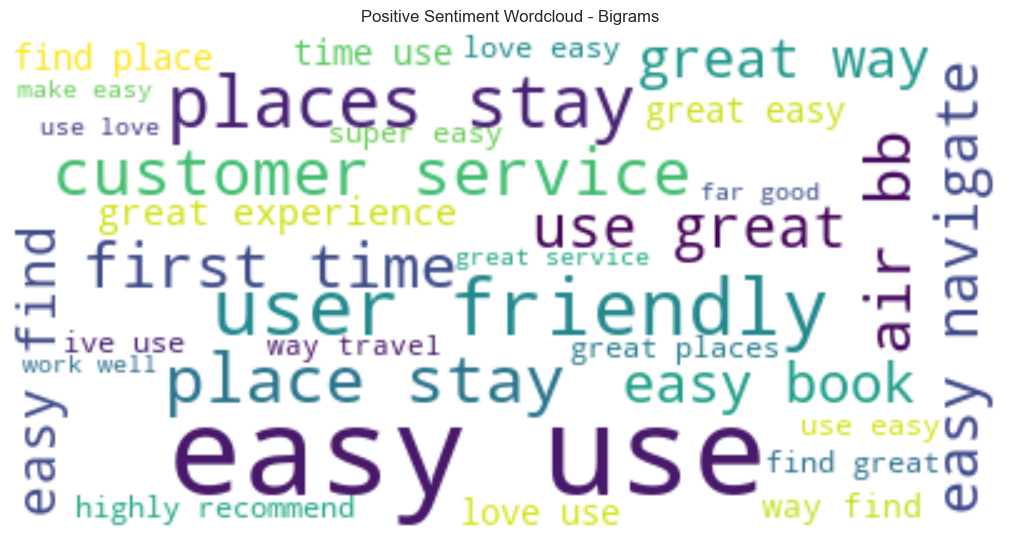

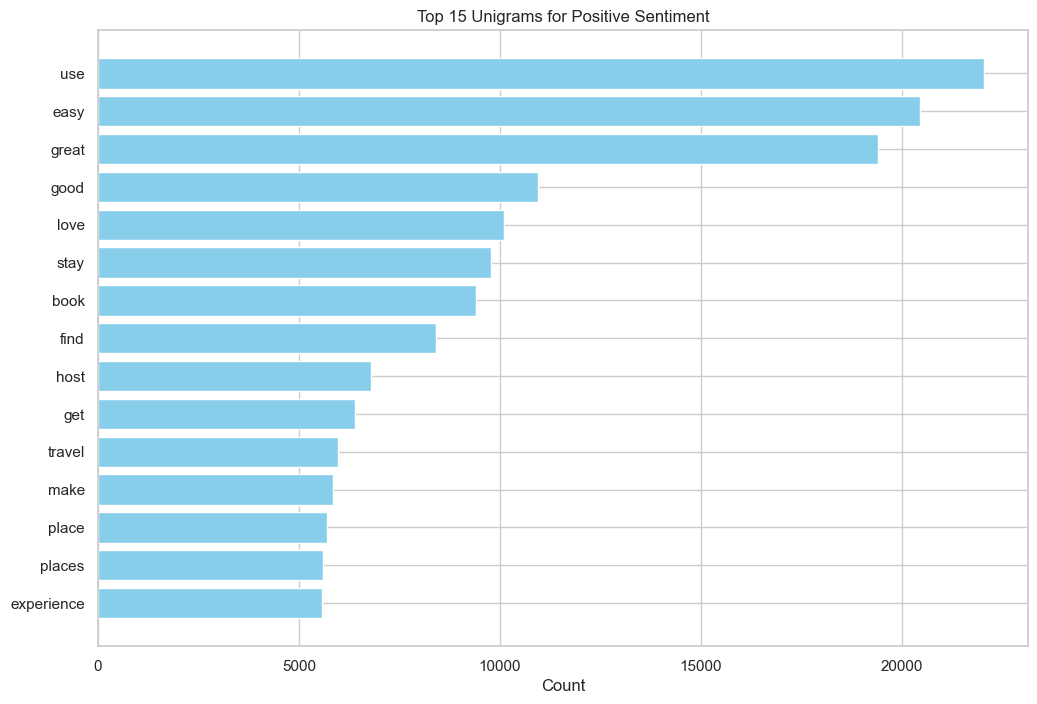

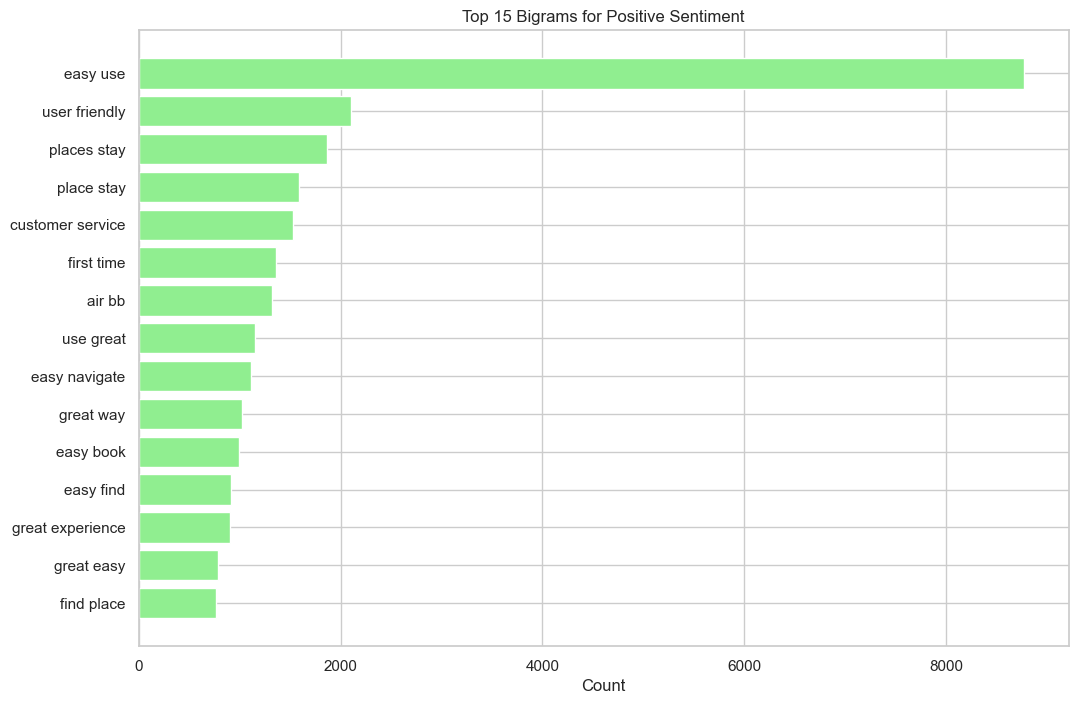







Ngrams and Wordcloud for positive sentiment in App2





Top 15 Unigrams for Positive sentiment in given app data:
   Positive_word  count
0           easy  11528
1           book  10663
2            use   9076
3           good   8277
4          hotel   7777
5          great   5385
6           best   4729
7          price   4243
8            get   3027
9           apps   3005
10        hotels   2615
11      customer   2469
12          love   2325
13       booking   2302
14        always   2270


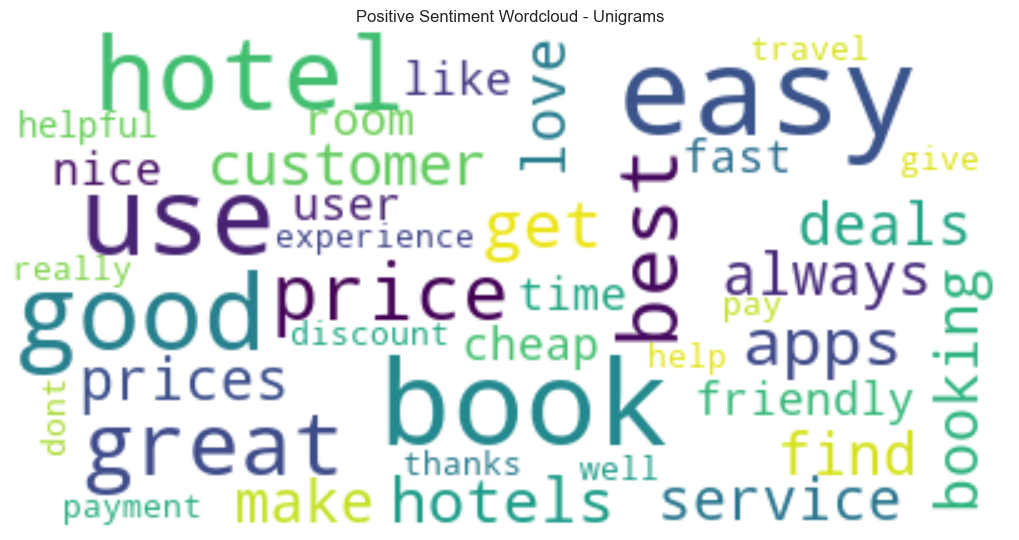

Top 15 Bigrams for Positive sentiment in given app data:
     Positive_bigram  count
0           easy use   4143
1      user friendly   1420
2         book hotel   1407
3          easy book   1316
4   customer service    931
5      customer care    746
6         hotel book    724
7         best price    593
8        great deals    574
9        book hotels    559
10        good price    544
11       credit card    501
12        good deals    413
13         fast easy    386
14          use book    384


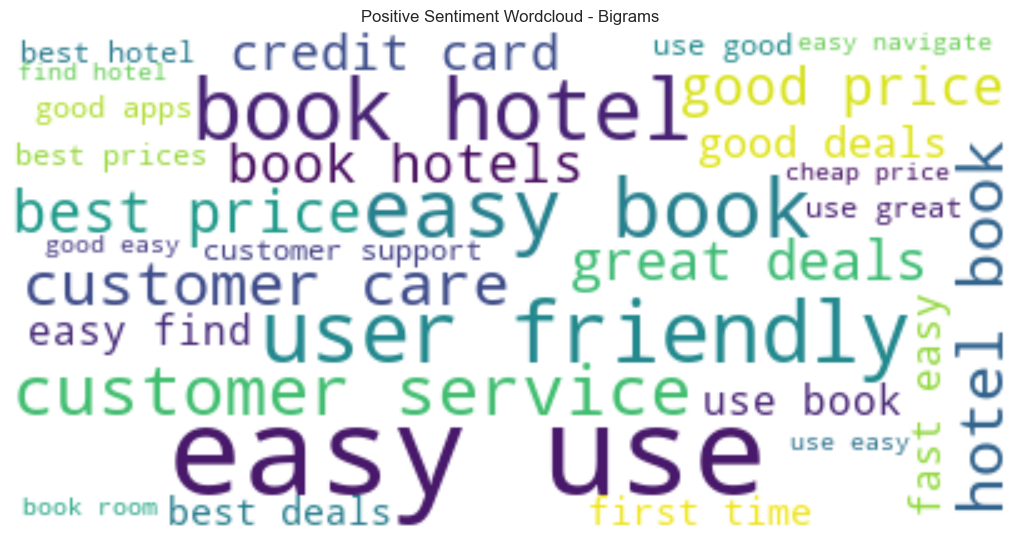

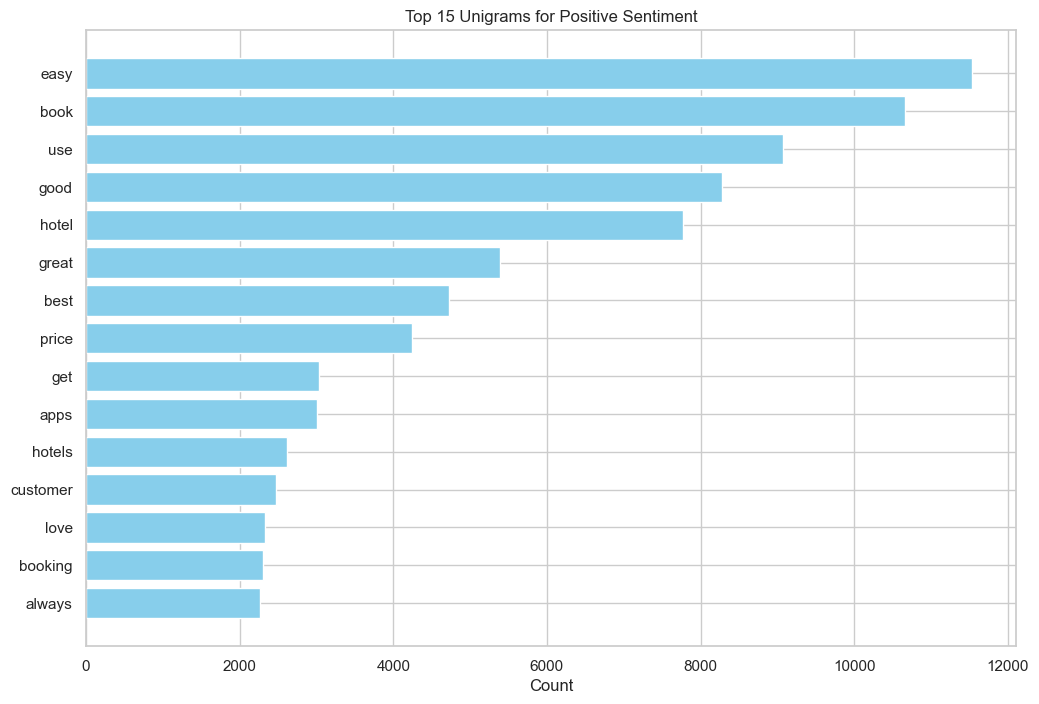

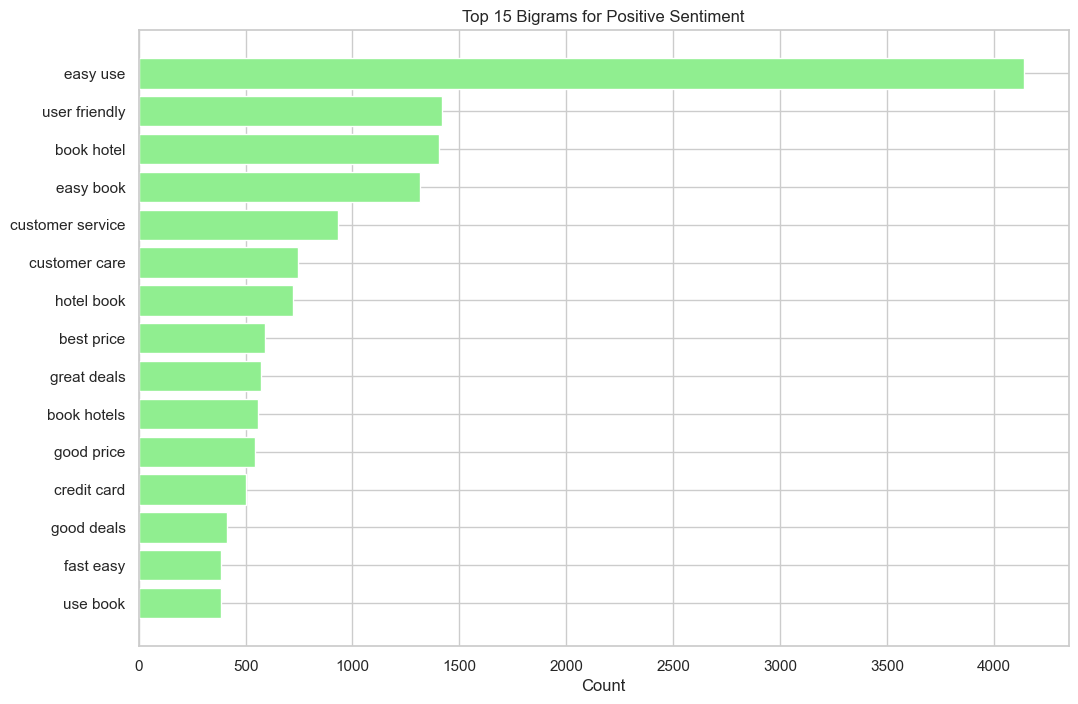







Ngrams and Wordcloud for negative sentiment in App1





Top 15 Unigrams for Negative sentiment in given app data:
   Negative_word  count
0            use   4529
1           book   4387
2            get   4150
3           host   3658
4        service   2627
5            bad   2575
6            try   2375
7           time   2263
8           cant   2220
9         cancel   2197
10          dont   2190
11      customer   2046
12          make   2016
13          even   2015
14            go   1966


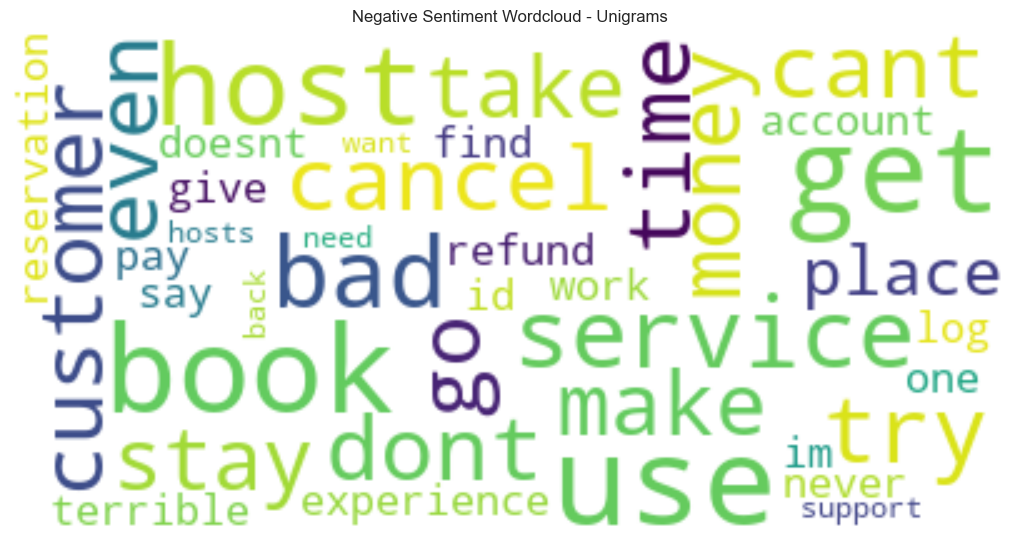

Top 15 Bigrams for Negative sentiment in given app data:
       Negative_bigram  count
0     customer service   1430
1       bad experience    444
2               air bb    436
3            never use    347
4             try book    288
5   cancel reservation    287
6          doesnt work    277
7           waste time    273
8           first time    267
9     customer support    252
10          book place    246
11            go wrong    238
12        phone number    233
13            wont let    231
14          every time    226


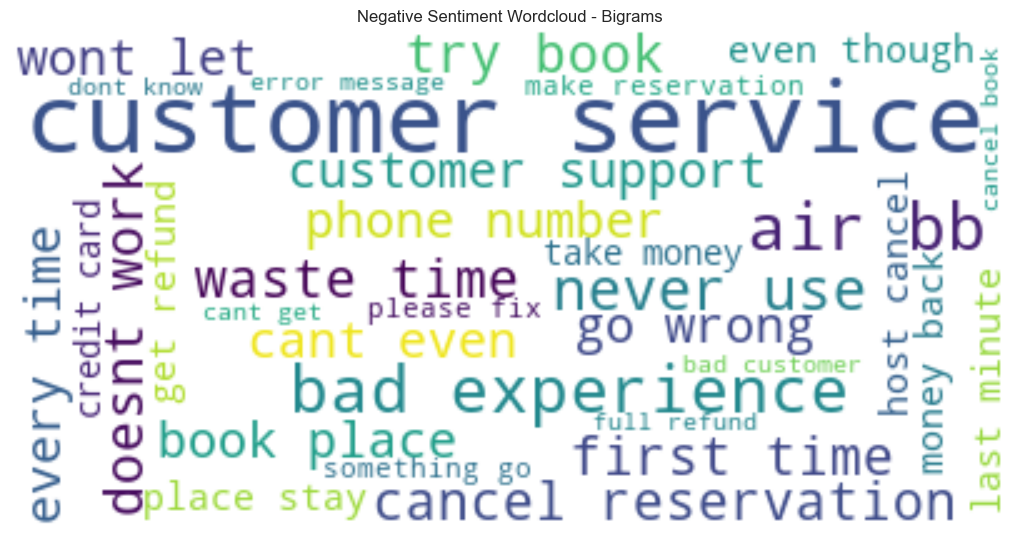

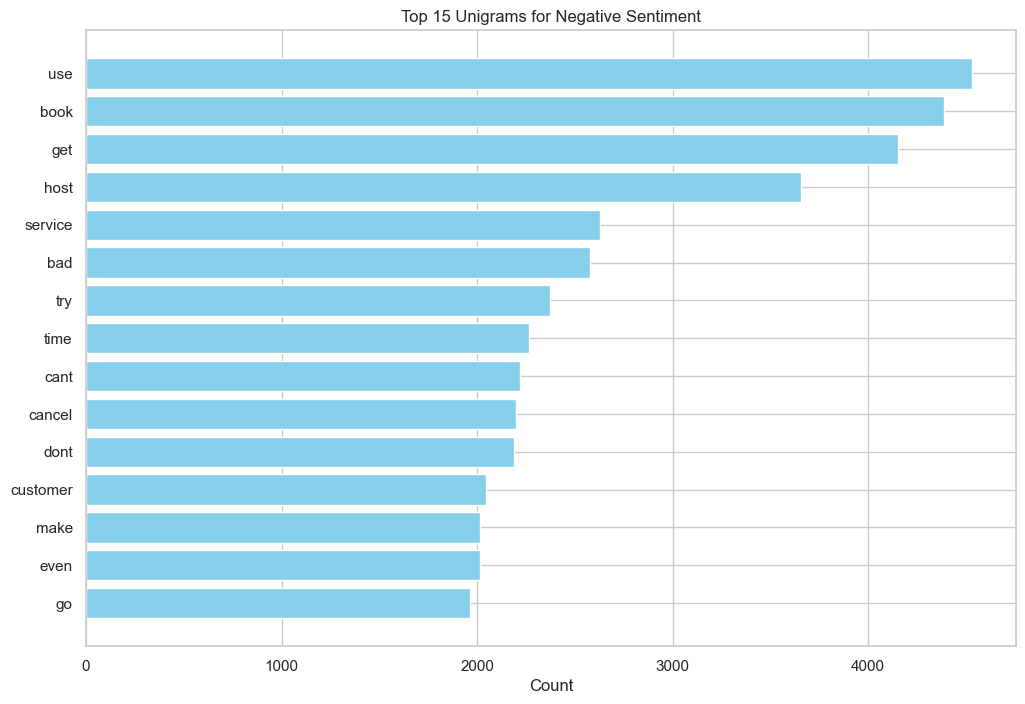

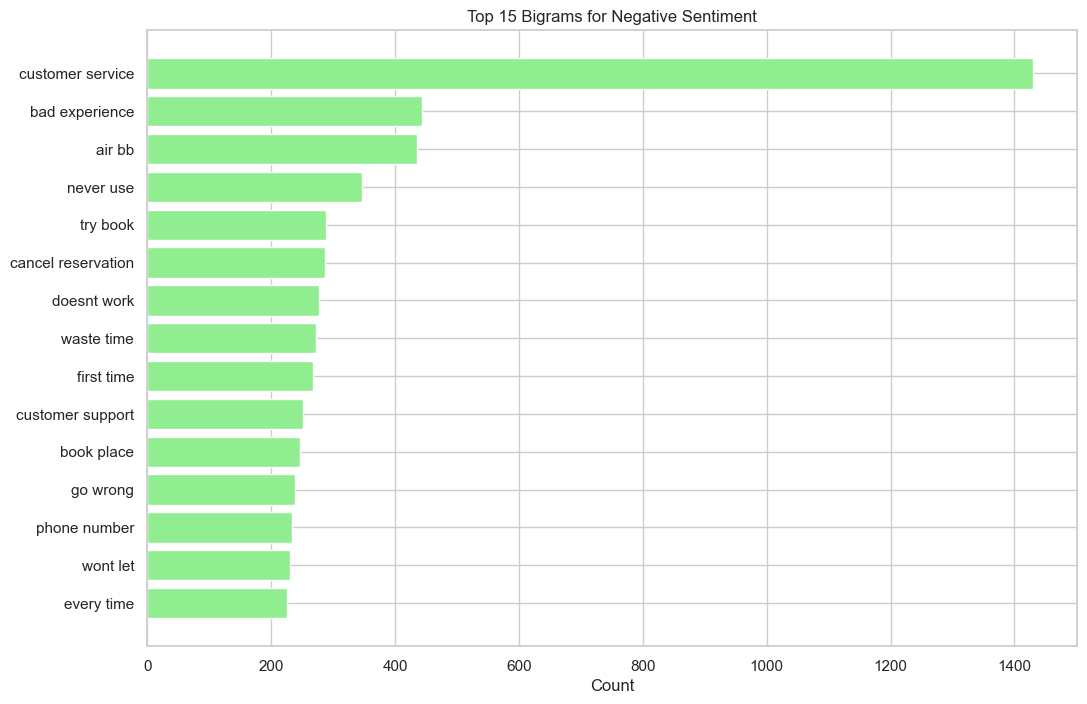







Ngrams and Wordcloud for negative sentiment in App2





Top 15 Unigrams for Negative sentiment in given app data:
   Negative_word  count
0           book   9848
1          hotel   7415
2            bad   3849
3       customer   3218
4            use   2730
5        service   2726
6           dont   2629
7            get   2610
8           room   2455
9          money   2418
10        cancel   2368
11           say   2363
12           pay   2345
13        refund   2218
14    experience   2009


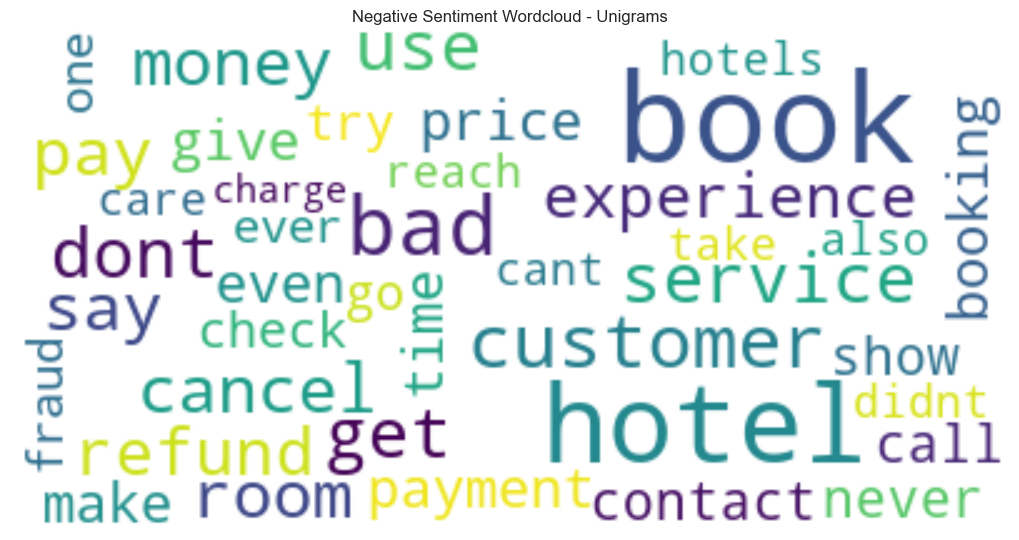

Top 15 Bigrams for Negative sentiment in given app data:
     Negative_bigram  count
0   customer service   1536
1         book hotel   1304
2     bad experience   1147
3      customer care    763
4        cancel book    618
5         hotel book    487
6   customer support    439
7          book room    405
8        reach hotel    379
9           dont use    343
10      booked hotel    302
11         dont book    302
12       bad service    296
13        get refund    280
14       credit card    274


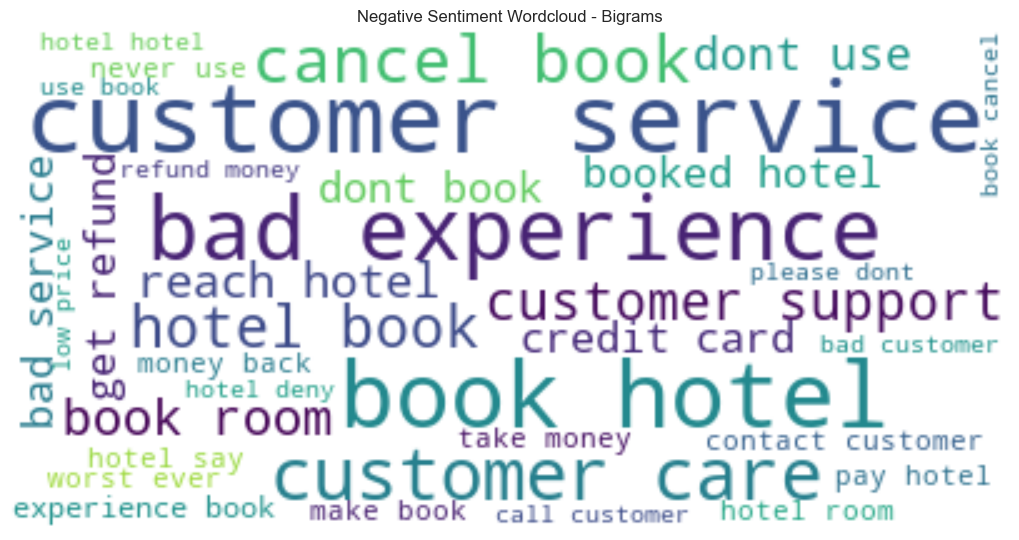

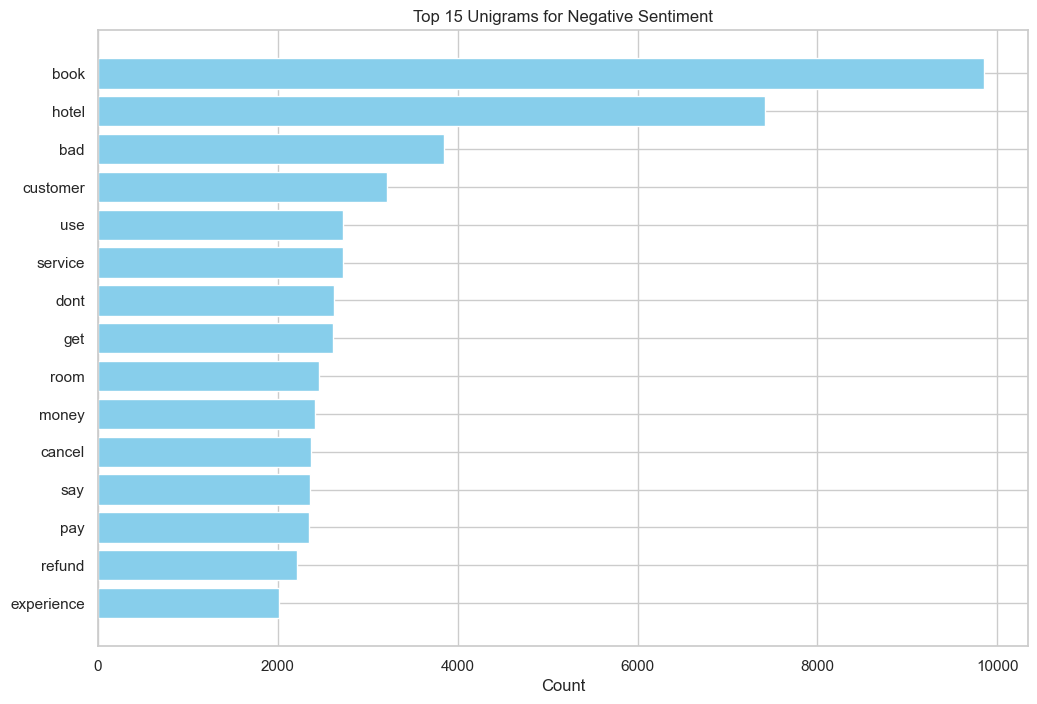

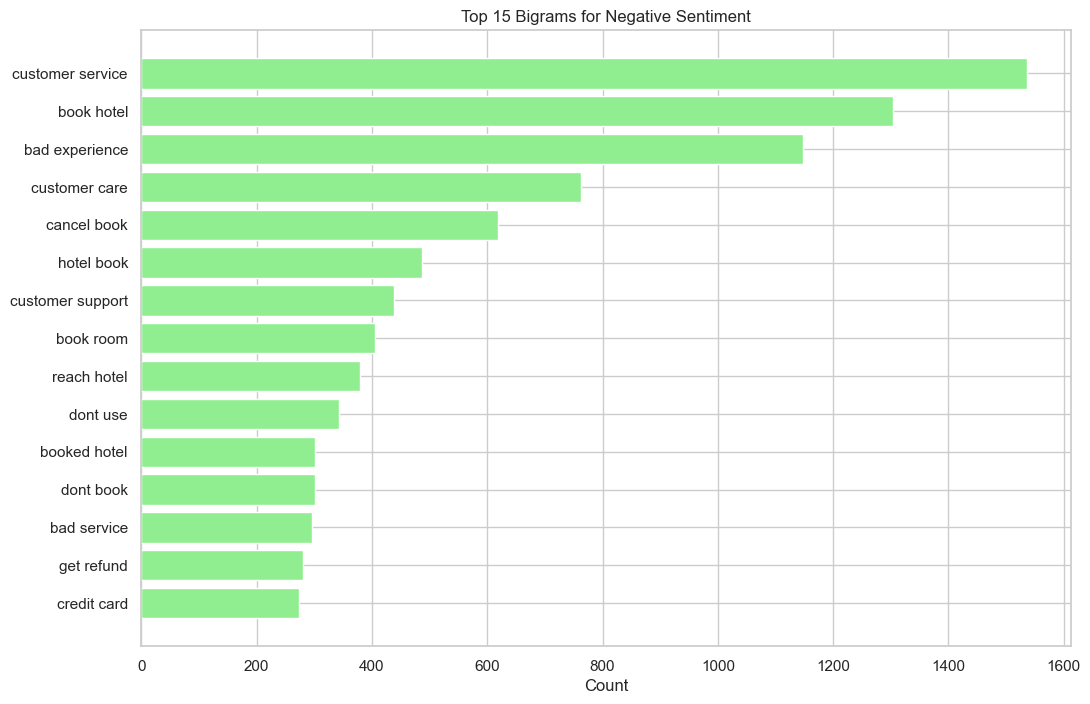

In [17]:
for sentiment in ['positive', 'negative']:
    for i in separated_app_data:
        print(f'\033[1mNgrams and Wordcloud for {sentiment} sentiment in {i}\033[0m\n\n\n\n\n')
        process_sentiment(separated_data[i], sentiment)
        print('\n\n\n\n\n')

Creating a function to calculate sentiments percentages in apps

In [18]:
def calculate_sentiment_percentages(sentiments_counts):
    percentages = (sentiments_counts / sentiments_counts.sum()) * 100
    return percentages

Creating comparison table of all apps

In [19]:
data = {}
for app_key in separated_app_data:
    app_name = app_key.split('_')[0]
    sentiment_counts = separated_data[app_key]['sentiment_vader'].value_counts()
    data[app_name] = sentiment_counts
data_for_apps_info = []
for app, counts in data.items():
    percentages = calculate_sentiment_percentages(counts)
    app_data = {
        'app_name': app,
        'totalSenti_count': counts.sum(),
        'positiveSenti_count': counts['positive'],
        'negativeSenti_count': counts['negative'],
        'positiveSenti_percentage': percentages['positive'],
        'negativeSenti_percentage': percentages['negative']
    }
    data_for_apps_info.append(app_data)
    
app_info_df = pd.DataFrame(data_for_apps_info, columns=['app_name', 'totalSenti_count', 'positiveSenti_count', 'negativeSenti_count', 'positiveSenti_percentage', 'negativeSenti_percentage'])
display(app_info_df)

app_name  totalSenti_count  positiveSenti_count  negativeSenti_count  \
0     App1            115354                80566                20029   
1     App2             61746                39103                12971   

   positiveSenti_percentage  negativeSenti_percentage  
0                 69.842398                 17.363074  
1                 63.328799                 21.007029

Visualizing positive and negative sentiments percentages of both app data together

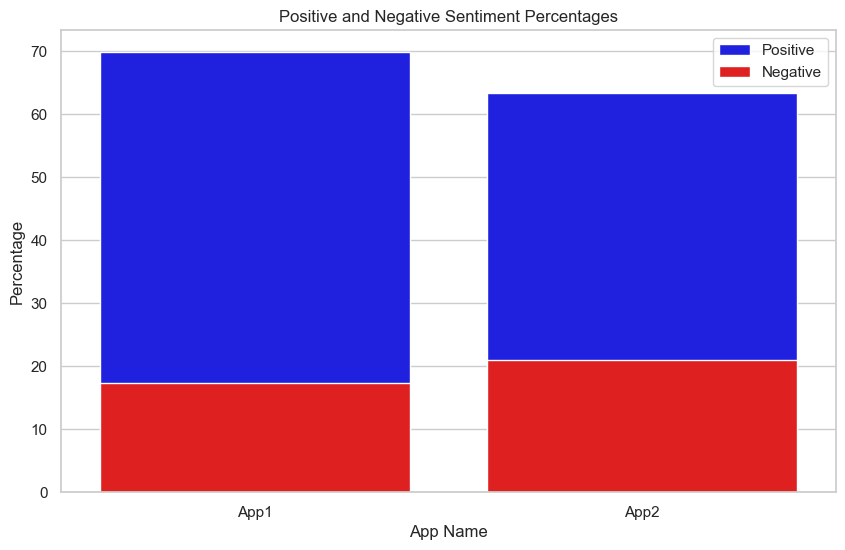

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x='app_name', y='positiveSenti_percentage', data=app_info_df, color='blue', label='Positive')
sns.barplot(x='app_name', y='negativeSenti_percentage', data=app_info_df, color='red', label='Negative')
plt.xlabel('App Name')
plt.ylabel('Percentage')
plt.title('Positive and Negative Sentiment Percentages')
plt.legend()
plt.show()

Displaying sentiments percentages distribution of apps through charts

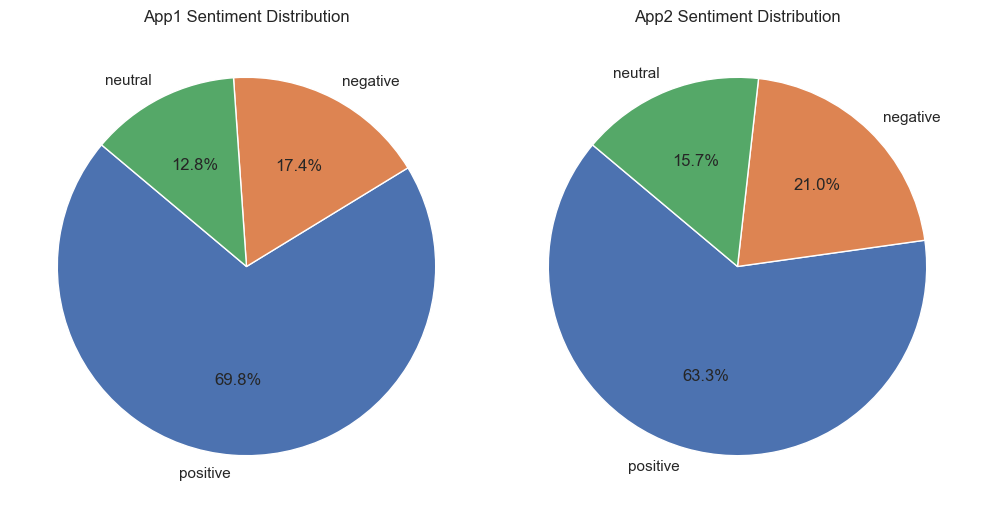

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

for i, app in enumerate(data.keys()):
    counts = data[app]
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'{app} Sentiment Distribution')

plt.tight_layout()
plt.show()